<a href="https://colab.research.google.com/github/haikali3/tomato-leaf-disease-CNN/blob/main/Tomato_Leaf_Disease_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown --id 1tYz5gTr7lhfA30kYBVJBumJWOBKlnoCu

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tYz5gTr7lhfA30kYBVJBumJWOBKlnoCu
To: /content/data.zip
100% 283M/283M [00:02<00:00, 104MB/s]


In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/powdery_mildew/pm88_change_180.jpg  
  inflating: data/train/powdery_mildew/pm88_change_270.jpg  
  inflating: data/train/powdery_mildew/pm88_lower.jpg  
  inflating: data/train/powdery_mildew/pm88_mirror.jpg  
  inflating: data/train/powdery_mildew/pm88_mirror_vertical.jpg  
  inflating: data/train/powdery_mildew/pm89.JPG  
  inflating: data/train/powdery_mildew/pm89_change_180.jpg  
  inflating: data/train/powdery_mildew/pm89_change_270.jpg  
  inflating: data/train/powdery_mildew/pm89_hight.jpg  
  inflating: data/train/powdery_mildew/pm89_lower.jpg  
  inflating: data/train/powdery_mildew/pm89_mirror.jpg  
  inflating: data/train/powdery_mildew/pm9.jpg  
  inflating: data/train/powdery_mildew/pm9_change_180.jpg  
  inflating: data/train/powdery_mildew/pm9_change_90.jpg  
  inflating: data/train/powdery_mildew/pm9_hight.jpg  
  inflating: data/train/powdery_mildew/pm9_lower.jpg  
  inflating: data/train/powde

In [ ]:
# import all the necessary libraries

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
# set path for the folders containing the images to train and test

train = r'/content/data/train'
test  = r'/content/data/test'

In [ ]:
# size

size  = 224 # size of input images

batch_size = 32 # no. of images to be yielded from the generator per batch

In [ ]:
#Data Augmentation

datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                height_shift_range=0.2,
                                validation_split=0.2)



X_train = datagen.flow_from_directory(train, target_size=(size,size),
                                      batch_size=batch_size,
                                      class_mode='categorical',
                                      subset='training')



X_test = ImageDataGenerator(rescale=1./255).flow_from_directory(test,
                                     target_size=(size,size),
                                     batch_size=batch_size,
                                     class_mode='categorical',
                                     subset='training')



X_test.class_indices.keys()

Found 4742 images belonging to 3 classes.
Found 1496 images belonging to 3 classes.


dict_keys(['Septoria_leaf_spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'powdery_mildew'])

In [ ]:
# call back setup



optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#Apple3.h5
checkpoint=ModelCheckpoint(r'Aple-model.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=15,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
#custom metric
import keras.backend as K
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
# Sequential Model
# CNN

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(size,size,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(224,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', precision, recall])
model.summary()

# print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
history = model.fit(x=X_train, validation_data=X_test,
                    epochs=2,
                    steps_per_epoch=X_train.samples//batch_size,
                    validation_steps=X_test.samples//batch_size,
                    callbacks=callbacks)

Epoch 1/2
148/148 [==============================] - ETA: 0s - loss: 0.7000 - accuracy: 0.6684 - precision: 0.9054 - recall: 0.2603
Epoch 1: val_loss improved from inf to 0.46303, saving model to Aple-model.h5
148/148 [==============================] - 87s 504ms/step - loss: 0.7000 - accuracy: 0.6684 - precision: 0.9054 - recall: 0.2603 - val_loss: 0.4630 - val_accuracy: 0.7962 - val_precision: 1.0000 - val_recall: 0.3234
Epoch 2/2
148/148 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.8142 - precision: 1.0000 - recall: 0.3156
Epoch 2: val_loss improved from 0.46303 to 0.33985, saving model to Aple-model.h5
148/148 [==============================] - 80s 543ms/step - loss: 0.4239 - accuracy: 0.8142 - precision: 1.0000 - recall: 0.3156 - val_loss: 0.3398 - val_accuracy: 0.8492 - val_precision: 1.0000 - val_recall: 0.3188


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1,3)

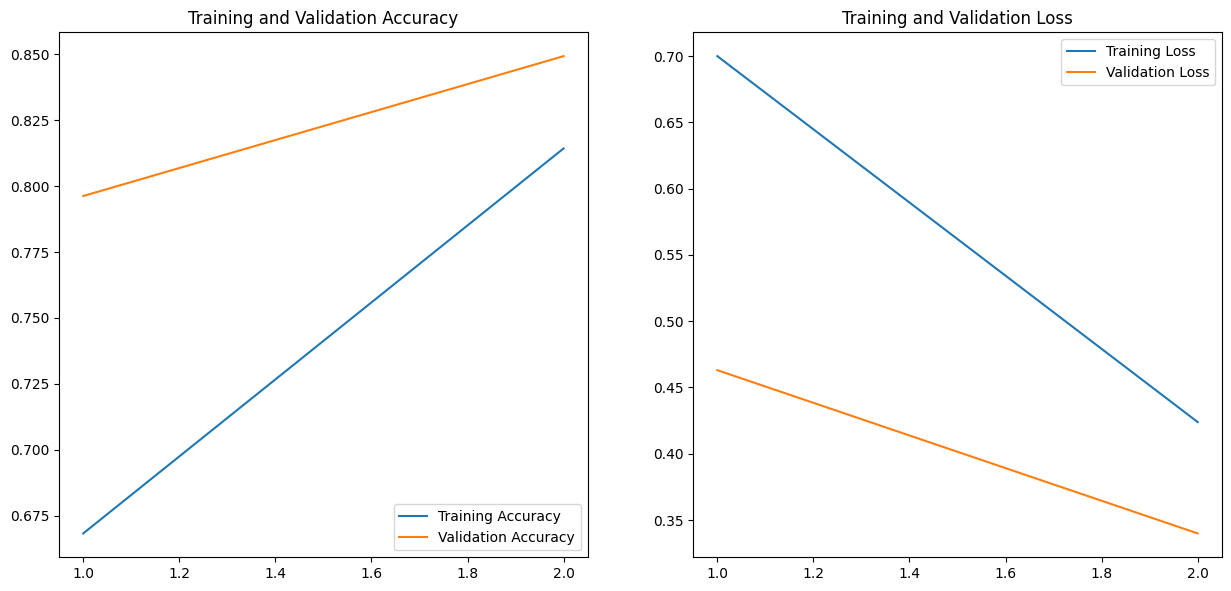

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

GUI cannot be used in google Colab



Input Image


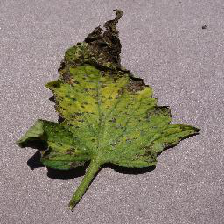

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Septoria Leaf Spot with a 57.61 percent confidence.


In [ ]:
#test Septoria Leaf Spot
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np

img = load_img('/content/data/test/Septoria_leaf_spot/046a86f0-bdae-438b-9c1f-b840c706f409___JR_Sept.L.S 8530.JPG', target_size=(size, size)) # set path to the input image
img_array = img_to_array(img)
print("Input Image")
array_to_img(img_array).show()
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
class_names = ["Septoria Leaf Spot", "Tomato Yellow Leaf Curl Virus", "Powdery Mildew"]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)